# Movie-Genre classification
**Movie genres are stylistic categories that organize films based on criteria such as the setting, characters, plot, mood, tone, and theme.**

- Action: Features fast-paced sequences, stunts, and battles.
- Adventure: Focuses on exploration, quests, or journeys.
- Drama: Character-driven stories that focus on emotional, moral, or social issues.
- Comedy: Intended to make the audience laugh, often through humor or satire.
- Horror: Designed to evoke fear, suspense, or shock.
- Documentary: Non-fiction films that depict real events, people, or subjects.
- Animated: Created using animation techniques, often appeals to all ages.
- Romantic Comedy (Rom-Com): Combines romance with humor.
- Musical: Features characters who express themselves through song and dance.
- Science Fiction: Focuses on futuristic or speculative technology and worlds.ture

- Movie genre classification is essential for improving user experience by helping viewers discover content they enjoy and receive personalized recommendations.
- It also enables targeted marketing, allowing studios to promote films to the right audience. 
- Genre classification aids in organizing large content libraries, making search and management easier for streaming platforms. 
- It supports research, film analysis, and automated recommendation systems by categorizing movies for data-driven insights.
- Additionally, it helps guide production decisions, ensures appropriate content regulation, and reflects societal trends, making it crucial for both entertainment and technology industries.

# import necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Read the text file

In [2]:
with open("train_data.txt",encoding="utf-8") as file:
    train_text = file.readlines()

In [3]:
train_df = pd.DataFrame([x.strip().split(':::') for x in train_text],columns=['ID','Title','Genre','Description'])

In [4]:
with open("test_data.txt",encoding="utf-8") as file:
    test_text = file.readlines()

In [5]:
test_df = pd.DataFrame([x.strip().split(':::') for x in test_text],columns=['ID','Title','Description'])

# Sanity check for the data

In [6]:
train_df.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
test_df.head()

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [8]:
train_df.shape

(54214, 4)

In [9]:
test_df.shape

(54200, 3)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  object
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  object
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [12]:
train_df.describe()

,ID,Title,Genre,Description
count,54214,54214,54214,54214
unique,54214,54214,27,54086
top,1,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,1,13613,12


In [13]:
test_df.describe()

,ID,Title,Description
count,54200,54200,54200
unique,54200,54200,54072
top,1,Edgar's Lunch (1998),Grammy - music award of the American academy ...
freq,1,1,10


In [14]:
train_df.columns

Index(['ID', 'Title', 'Genre', 'Description'], dtype='object')

In [15]:
test_df.columns

Index(['ID', 'Title', 'Description'], dtype='object')

In [16]:
train_df.isnull().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

In [17]:
test_df.isnull().sum()

ID             0
Title          0
Description    0
dtype: int64

# Data Visualizing

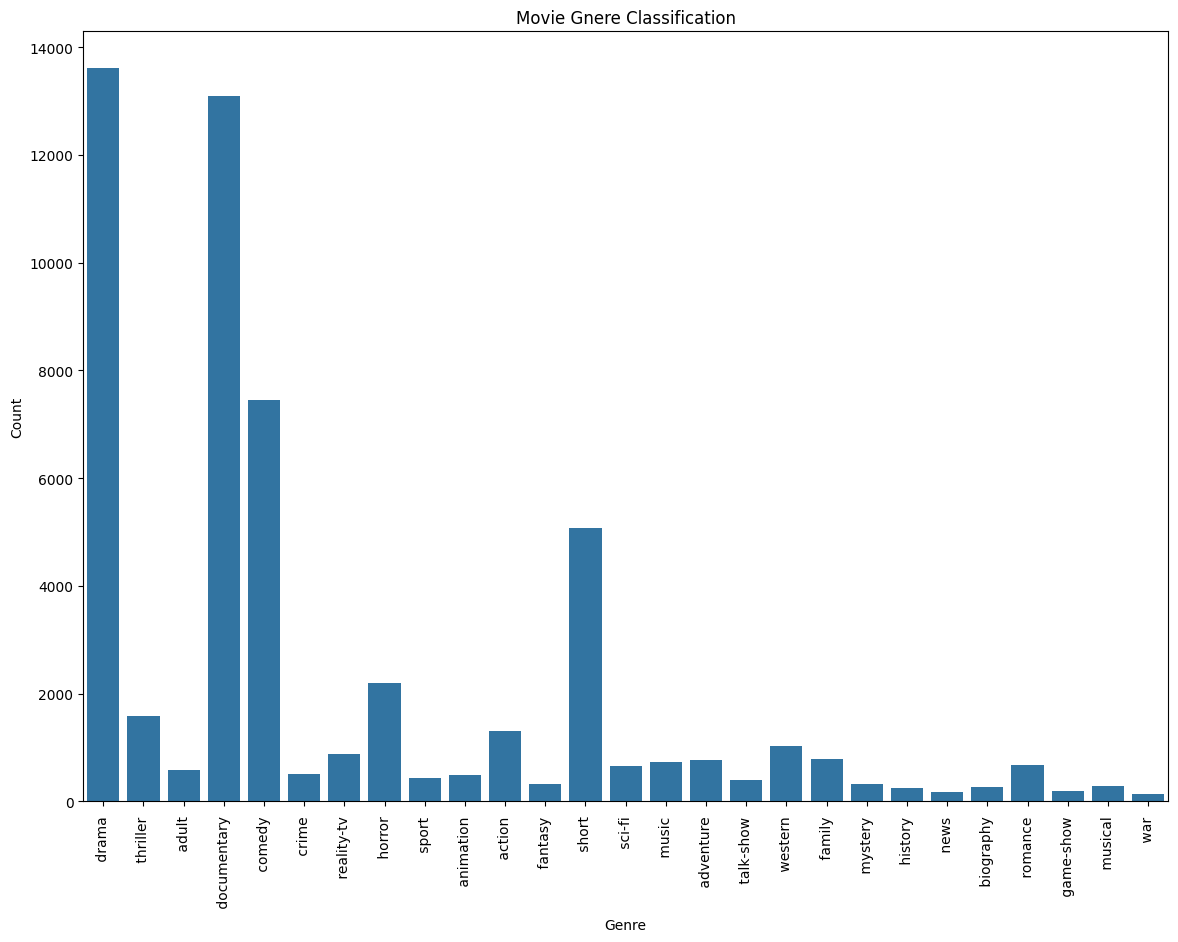

In [18]:
plt.figure(figsize=(14,10))
sns.countplot(x = 'Genre',data = train_df)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Movie Gnere Classification")
plt.xticks(rotation=90)
plt.show()

In [19]:
Genre_counts = train_df["Genre"].value_counts()

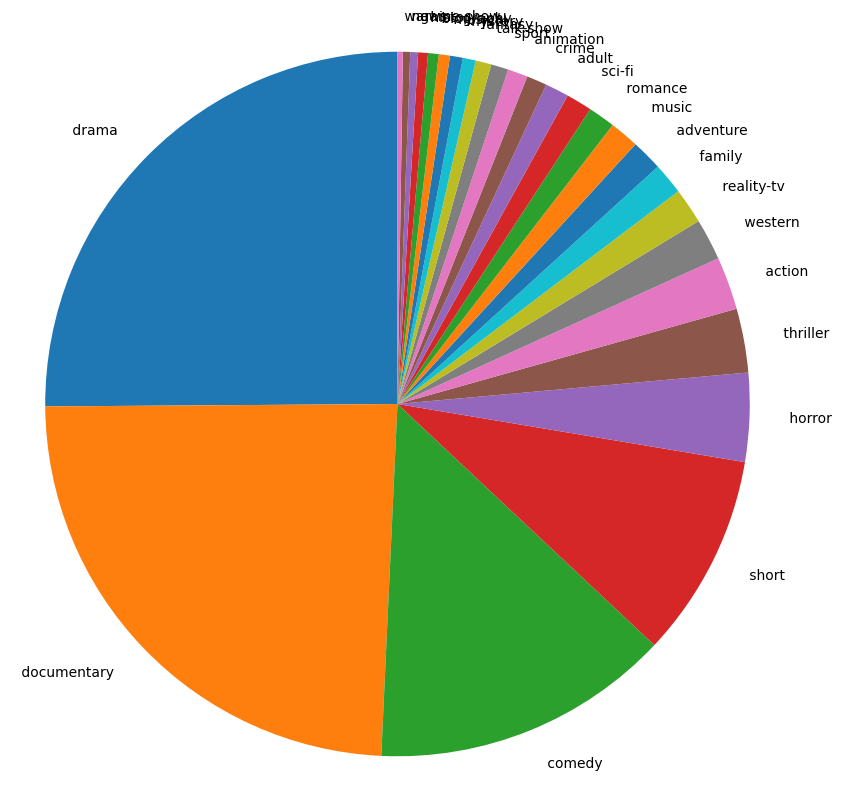

In [34]:
plt.figure(figsize=(10,10))
plt.pie(Genre_counts,labels = Genre_counts.index,startangle=90)
plt.axis('equal')
plt.show()

In [21]:
Genre_counts.size

27

# Data Preprocessing

In [22]:
final_df = pd.concat([train_df,test_df],axis=0)

In [23]:
final_df

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",NaN,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),NaN,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),NaN,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),NaN,"Popular, but mysterious rock D.J Mike Mallard..."


In [24]:
vectorizer = TfidfVectorizer()

In [35]:
x = vectorizer.fit_transform(final_df['Description'])

In [36]:
x

<108414x176561 sparse matrix of type '<class 'numpy.float64'>'
	with 7467724 stored elements in Compressed Sparse Row format>

In [27]:
encoder = LabelEncoder()

In [28]:
final_df["Title"] = encoder.fit_transform(final_df["Title"])
final_df["Genre"] = encoder.fit_transform(final_df["Genre"])

In [29]:
train_df.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [30]:
final_df["Genre"] = final_df.Genre.fillna(final_df["Genre"].mean())

In [31]:
final_df.head()

,ID,Title,Genre,Description
0,1,70147,8,Listening in to a conversation between his do...
1,2,31219,24,A brother and sister with a past incestuous r...
2,3,107508,1,As the bus empties the students for their fie...
3,4,96121,8,To help their unemployed father make ends mee...
4,5,97559,8,The film's title refers not only to the un-re...


In [37]:
y = final_df['Genre']

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [39]:
nv = MultinomialNB()

In [40]:
nv.fit(x_train,y_train)

MultinomialNB()

In [41]:
nb_pred = nv.predict(x_test)

In [42]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       402
           1       0.00      0.00      0.00       175
           2       0.00      0.00      0.00       235
           3       0.00      0.00      0.00       146
           4       0.00      0.00      0.00        83
           5       0.25      0.01      0.02      2225
           6       0.00      0.00      0.00       167
           7       1.00      0.00      0.00      3963
           8       0.21      0.00      0.00      4147
           9       0.00      0.00      0.00       232
          10       0.00      0.00      0.00       111
          11       0.00      0.00      0.00        50
          12       0.00      0.00      0.00        90
          13       0.00      0.00      0.00       643
          14       0.00      0.00      0.00       211
          15       0.00      0.00      0.00        81
          16       0.00      0.00      0.00        85
          17       0.00    

In [43]:
lr = LogisticRegression()

In [44]:
lr.fit(x_train,y_train)

LogisticRegression()

In [46]:
lr_pred = lr.predict(x_test)

In [47]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.12      0.00      0.01       402
           1       0.22      0.01      0.02       175
           2       0.00      0.00      0.00       235
           3       0.00      0.00      0.00       146
           4       0.00      0.00      0.00        83
           5       0.39      0.10      0.16      2225
           6       0.00      0.00      0.00       167
           7       0.44      0.23      0.30      3963
           8       0.38      0.12      0.19      4147
           9       0.00      0.00      0.00       232
          10       0.00      0.00      0.00       111
          11       0.50      0.08      0.14        50
          12       0.00      0.00      0.00        90
          13       0.44      0.09      0.15       643
          14       0.38      0.10      0.16       211
          15       0.00      0.00      0.00        81
          16       0.00      0.00      0.00        85
          17       0.00    